# 문서 분류(Document Classification)

## 데이터 준비
* 문서 분류에 필요한 데이터는 scikit-learn이 제공하는 20개의 주제를 가지는 뉴스그룹 데이터를 사용
* 텍스트는 CounterVectorizer를 거쳐 DTM으로 변환
* DTM은문서에 등장하는 단어들을 빈도 수 별로 표현한 행렬

In [1]:
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split

news = fetch_20newsgroups()

In [2]:
news.keys()

dict_keys(['data', 'filenames', 'target_names', 'target', 'DESCR'])

In [3]:
news.data[:2]

["From: lerxst@wam.umd.edu (where's my thing)\nSubject: WHAT car is this!?\nNntp-Posting-Host: rac3.wam.umd.edu\nOrganization: University of Maryland, College Park\nLines: 15\n\n I was wondering if anyone out there could enlighten me on this car I saw\nthe other day. It was a 2-door sports car, looked to be from the late 60s/\nearly 70s. It was called a Bricklin. The doors were really small. In addition,\nthe front bumper was separate from the rest of the body. This is \nall I know. If anyone can tellme a model name, engine specs, years\nof production, where this car is made, history, or whatever info you\nhave on this funky looking car, please e-mail.\n\nThanks,\n- IL\n   ---- brought to you by your neighborhood Lerxst ----\n\n\n\n\n",
 "From: guykuo@carson.u.washington.edu (Guy Kuo)\nSubject: SI Clock Poll - Final Call\nSummary: Final call for SI clock reports\nKeywords: SI,acceleration,clock,upgrade\nArticle-I.D.: shelley.1qvfo9INNc3s\nOrganization: University of Washington\nLines: 

In [4]:
news.target_names

['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']

In [5]:
x = news.data
y = news.target

cv = CountVectorizer()
x = cv.fit_transform(x)

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.3)
print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

(7919, 130107) (7919,) (3395, 130107) (3395,)


In [6]:
print(x_train[0]) #0번째 문서에서 , 56979 인덱스 단어가 2번 등장했다.

  (0, 56979)	2
  (0, 85354)	2
  (0, 114688)	1
  (0, 111322)	1
  (0, 68532)	1
  (0, 114731)	1
  (0, 90379)	1
  (0, 76032)	1
  (0, 114579)	1
  (0, 114455)	2
  (0, 115475)	1
  (0, 32311)	1
  (0, 66608)	3
  (0, 27436)	1
  (0, 37565)	1
  (0, 128402)	1
  (0, 62221)	1
  (0, 29573)	1
  (0, 124616)	1
  (0, 28146)	2
  (0, 124332)	1
  (0, 26605)	1
  (0, 29620)	1
  (0, 80010)	2
  (0, 28012)	1
  :	:
  (0, 58500)	1
  (0, 49336)	1
  (0, 82571)	1
  (0, 111911)	1
  (0, 68157)	1
  (0, 81124)	1
  (0, 93463)	1
  (0, 72413)	1
  (0, 94913)	1
  (0, 22211)	1
  (0, 114804)	1
  (0, 81207)	1
  (0, 106554)	1
  (0, 77294)	1
  (0, 113650)	2
  (0, 70356)	1
  (0, 94583)	1
  (0, 83445)	1
  (0, 4745)	1
  (0, 19280)	1
  (0, 31460)	1
  (0, 125105)	1
  (0, 83641)	1
  (0, 32720)	1
  (0, 70068)	1


## scikit-learn을 이용한 문서 분류

In [7]:
from sklearn.metrics import accuracy_score

### Logistic Regression
* 이중분류모델
* Logistic Regression은 특성상 다중 분류에는 적합하지 않음
* 선형 회귀 모델에 시그모이드 함수를 적용

In [9]:
from sklearn.linear_model import LogisticRegression

LR = LogisticRegression(solver='liblinear')
LR.fit(x_train, y_train)
pred = LR.predict(x_test)
acc = accuracy_score(pred, y_test)
print(acc)

0.8966126656848307


### Support Vector Machines
* 회귀, 분류, 이상치 탐지 등에 사용되는 지도학습 방법
* 클래스 사이의 경계에 위치한 데이터 포인트를 서포트 벡터(support vector)라고 함
* 각 서포트 벡터가 클래스 사이의 결정 경계를 구분하는데 얼마나 중요한지를 학습
* 각 서포트 벡터 사이의 마진이 가장 큰 방향으로 학습
* 서포트 벡터까지의 거리와 서포트 벡터의 중요도를 기반으로 예측을 수행

In [12]:
from sklearn import svm

SVM = svm.SVC(kernel='linear')
SVM.fit(x_train, y_train)

pred = SVM.predict(x_test)
acc = accuracy_score(pred, y_test)
print(acc)

0.8282768777614139


### Naive Bayes Classification
* 베이즈 정리를 적용한 확률적 분류 알고리즘
* 모든 특성들이 독립임을 가정(naive 가정)
* 입력 특성에 따라 3개의 분류기 존재
    * 가우시안 나이브 베이즈 분류기
    * 베르누이 나이브 베이즈 분류기
    * 다항 나이브 베이즈 분류기

#### 문서 단어 행렬(Document-Term Matrix, DTM)을 이용한 나이브 베이즈
* 다수의 문서에서 등장하는 각 단어들의 빈도를 행렬로 표현한 것

In [13]:
from sklearn.naive_bayes import MultinomialNB

NB = MultinomialNB()
NB.fit(x_train, y_train)
pred = NB.predict(x_test)
acc = accuracy_score(pred, y_test)
print(acc)

0.8244477172312223


#### tf_idf를 이용한 정확도 향상 

`TF-IDF(Term Frequency - Inverse Document Frequency)` 란?  
* TF(단어 빈도, term frequency)는 특정한 단어가 문서 내에 얼마나 자주 등장하는지를 나타내는 값. 
* 이 값이 높을수록 문서에서 중요하다고 생각할 수 있다.
* 하지만 하나의 문서에서 많이 나오지 않고 다른 문서에서 자주 등장하면 단어의 중요도는 낮아진다.
* DF(문서 빈도, document frequency)라고 하며, 이 값의 역수를 IDF(역문서 빈도, inverse document frequency)라고 한다.
* TF-IDF는 TF와 IDF를 곱한 값으로 점수가 높은 단어일수록 `다른 문서에는 많지 않고 해당 문서에서 자주 등장하는 단어`를 의미.

In [14]:
from sklearn.feature_extraction.text import TfidfTransformer

tfidf = TfidfTransformer()
x_train_tf = tfidf.fit_transform(x_train)
x_test_tf = tfidf.fit_transform(x_test)

NB.fit(x_train_tf, y_train)
pred = NB.predict(x_test_tf)
acc = accuracy_score(pred, y_test)
print(acc)

0.8332842415316642


### Decision Tree
* 분류나 회귀에 사용되는 지도 학습 방법
* 데이터 특성으로부터 추론된 결정 `규칙`을 통해 값을 예측
* if-then-else 결정 규칙을 통해 데이터 학습
* 트리의 깊이가 깊을수록 복잡한 모델

* 스무고개 하듯이 예/아니오 질문을 이어가며 학습
* 한번의 분기 때마다 변수 영역을 두 개로 구분합니다
* 나뉜 각 범주에서 또 다시 데이터를 가장 잘 구분할 수 있는 질문을 기준으로 나눕니다. 이를 지나치게 많이 하면 오버피팅이 됩니다. 결정 트리에 아무 파라미터를 주지 않고 모델링하면 오버피팅이 됩니다. 

In [16]:
from sklearn.tree import DecisionTreeClassifier

DT = DecisionTreeClassifier()
DT.fit(x_train, y_train)
pred = DT.predict(x_test)
acc = accuracy_score(pred, y_test)
print(acc)
# 현재 데이터로는 규칙을 찾기가 어려워서 정확도가 떨어짐.
# 데이터 자체가 document, index라서. index만으로는 규칙을 찾기가 어려움..

0.6382916053019145


### XGBoost
* XGBoost는 여러개의 Decision Tree를 조합해서 사용하는 Ensemble 알고리즘이다.
* 분류에 있어서 다른 알고리즘보다 좋은 예측 성능을 보여줌  
 
   
* Boosting
    * 약한 예측 모형들의 학습 에러에 가중치를 두고, 순차적으로 다음 학습 모델에 반영
* Boosting 기법을 이용하여 구현한 알고리즘은 Gradient Boost 가 대표적인데
* 이 알고리즘을 병렬 학습이 지원되도록 구현한 라이브러리가 XGBoost 이다.  


* 장점
    * GBM 대비 빠른 수행시간
        * 병렬 처리로 학습, 분류 속도가 빠르다.

    * 과적합 규제(Regularization)
        * 표준 GBM 경우 과적합 규제기능이 없으나, XGBoost는 자체에 과적합 규제 기능으로 강한 내구성 지닌다.

    * 분류와 회귀영역에서 뛰어난 예측 성능 발휘
        * 즉, CART(Classification and regression tree) 앙상블 모델을 사용

    * Early Stopping(조기 종료) 기능이 있음
        * 다양한 옵션을 제공하며 Customizing이 용이하다.

In [22]:
from xgboost import XGBClassifier

xgb = XGBClassifier(n_estimators=30, learning_rate=0.05, max_depth=3, eval_metric='logloss', use_label_encoder =False)
xgb.fit(x_train, y_train)
pred = xgb.predict(x_test)
acc = accuracy_score(pred, y_test)
print(acc)

0.7181148748159057


## 교차 검증(Cross-Validation)
* 일반 검증은 학습 데이터가 검증 데이터로 사용되지 않음
    * 고정된 test set을 통해 모델의 성능을 검증하고 수정하는 과정을 반복하면, 결국 내가 만든 모델은 test set 에만 잘 동작하는 모델이 된다.
    * 즉, test set에 과적합(overfitting)하게 되므로, 다른 실제 데이터를 가져와 예측을 수행하면 엉망인 결과가 나와버리게 된다.
    
    
* train set + validation set으로 분리한 뒤, validation set을 사용해 검증하는 방식
* 교차 검증은 데이터를 N개의 집합으로 나누어 정확도를 계산해 학습 데이터로 사용된 데이터도 테스트 데이터로 사용


* 장점

    * 모데이터셋을 훈련에 활용할 수 있다.
        * 정확도를 향상시킬 수 있다.
        * 데이터 부족으로 인한 underfitting을 방지할 수 있다.
    
    
    * 모든 데이터셋을 평가에 활용할 수 있다.
        * 평가에 사용되는 데이터 편중을 막을 수 있다.
        * 평가 결과에 따라 좀 더 일반화된 모델을 만들 수 있다.

* 단점
    * Iteration 횟수가 많기 때문에, 모델 훈련/평가 시간이 오래 걸린다.

나이브 베이즈모델을 교차 검증

In [24]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(NB, x, y, cv=5)
print(scores, scores.mean())

[0.83870968 0.83826779 0.82368537 0.83031374 0.83642794] 0.833480903927519


### 정밀도(accuracy) 와 재현률(recall)

* `정확도(accuracy) `
    * 양성 클래스(정답)으로 예측한 샘플이 양성 클래스일 확률을 의미
    * 모델이 얼마나 양성 클래스를 잘 예측하는지를 나타냄
    
    
* `재현률(recall)`
    * 양성 클래스인 샘플에서 모델이 양성 클래스로 예측한 샘플 비율을 의미하며, 모델이 얼마나 실제 상황을 재현하는지를 나타냄
    * 항상 False라고 예측하는 모델은 accuracy가 높더라도 Recall이 0
    * 항상 true라고 예측하는 모델은 accuracy가 낮더라도 Recall은 1
    

* `정밀도(Precision)`
    * True로 예측한 데이터 중 실제로 True인 데이터의 수
    * 항상 True로 예측하는 모델은 Recall이 1이지만, Precision은 낮음
    * `Precision과 Recall은 서로 trade-off되는 관계가 있음`
    
    
* `F1-score`
    * precision 과 recall의 조화평균
    * 정확도에 비해 더 효과적인 모델 분석 지표로 알려져 있음
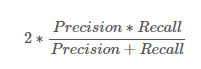

### 다중 클래스 분류에서 F1 스코어 사용하기

* 다중 클래스 분류 문제에서 정밀도와 재현률을 계산할 때는 클래스간의 지표를 어떻게 합칠지 지정 필요

  * None - 클래스간 지표를 합치지 말고 그대로 출력
  
  
  * micro - true positive와 false negative, false positive의 합을 산출해 스코어를 계산한다.
      * 각 샘플이나 예측에 동일한 가중치를 부여하고자 할 때 사용한다.
      * 정밀도와 재현률이 같음, 이로 인해 f1-score도 정밀도, 재현률과 동일
      
      
  * macro - 각 레이블의 unweighted된 평균(레이블이 불균형한 멀티-클래스 분류 문제에서)을 계산한다. 
      * 레이블이 불균형을 따로 고려하지 않는다.
      * 모든 클래스에 동일한 가중치를 부여하여 분류기의 전반적인 성능을 평가한다. 
      * 가장 빈도 높은 클래스 레이블의 성능이 중요하다.
      
      
  * weighted - 클래스간 지표를 가중 평균한 값
      * 각 레이블이 불균형해도, weight를 주어 평가지표를 계산한다. 
      * precision과 recall의 합이 아닌 F-score를 야기할 수 있다.
      
      
  * samples
      * 각 레이블의 평가지표를 평균 낸다.
      * accuracy_score와 다른 멀티-레이블 분류 문제에서만 의미 있다.

In [25]:
from sklearn.metrics import precision_score, recall_score, f1_score

f1_param = 'micro'

precision = precision_score(pred, y_test, average=f1_param)
recall = recall_score(pred, y_test,average=f1_param)
f1 = f1_score(pred, y_test,average =f1_param)

print(precision, recall, f1)

0.7181148748159057 0.7181148748159057 0.7181148748159056


In [26]:
f1_param = 'macro'

precision = precision_score(pred, y_test, average=f1_param)
recall = recall_score(pred, y_test,average=f1_param)
f1 = f1_score(pred, y_test,average =f1_param)

print(precision, recall, f1)

0.7112683870442805 0.746715318917738 0.7218431021112164


In [27]:
f1_param = 'weighted'

precision = precision_score(pred, y_test, average=f1_param)
recall = recall_score(pred, y_test,average=f1_param)
f1 = f1_score(pred, y_test,average =f1_param)

print(precision, recall, f1)

0.7237101048969392 0.7181148748159057 0.7107489856625017


## 그리드 검색을 이용한 파라미터 최적화

* 그리드 검색을 사용하면 분류기에 사용하는 파라미터 최적화 가능
* 그리드 검색을 통해 앞서 구성한 나이브 베이즈 모델의 'alpha' 파라미터를 최적화시키는 예제

* `estimator`: 사용 모델 객체     
* `param_grid`: 사용 객체:지정 파라미터 리스트로 구성된 딕셔너리    
* `scoring`: 최적화하고자 하는 성능 지표   
* `cv`: 교차 검증 분할 개수      

In [36]:
from sklearn.model_selection import GridSearchCV

GS = GridSearchCV(estimator = NB, param_grid={'alpha' : [0.00001, 0.0001, 0.0002, 0.0008]}, scoring='accuracy', cv=10)
GS.fit(x,y)

GridSearchCV(cv=10, estimator=MultinomialNB(),
             param_grid={'alpha': [1e-05, 0.0001, 0.0002, 0.0008]},
             scoring='accuracy')

In [37]:
print(GS.best_score_)
print(GS.best_params_)

0.8924339916206614
{'alpha': 1e-05}
